In [422]:
import pandas as pd
import numpy as np
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, InputLayer
from tensorflow.keras.optimizers import Adam
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import r2_score, mean_absolute_error
import matplotlib.pyplot as plt

In [423]:
# 1. Load and preprocess the data
df = pd.read_csv('delaney-processed.csv')
features = ['Minimum Degree', 'Molecular Weight', 'Number of H-Bond Donors', 'Number of Rings', 'Number of Rotatable Bonds', 'Polar Surface Area']
target = 'measured log solubility in mols per litre'
X = df[features]
y = df[target]

In [424]:
# Split the data
X_train, X_temp, y_train, y_temp = train_test_split(X, y, test_size=0.3, random_state=42)
X_val, X_test, y_val, y_test = train_test_split(X_temp, y_temp, test_size=0.5, random_state=42)

In [425]:
# Normalize the data
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_val_scaled = scaler.transform(X_val)
X_test_scaled = scaler.transform(X_test)

In [426]:
# # # Add dropout and regularization
# from tensorflow.keras.layers import Dropout
# from tensorflow.keras import regularizers

In [427]:
# from tensorflow.keras.callbacks import EarlyStopping
# early_stopping = EarlyStopping(monitor='val_loss', patience=15, restore_best_weights=True)

In [428]:
# 2. Define the model
model = Sequential()
model.add(InputLayer(input_shape=(6,)))  # Explicit input layer with 6 features
model.add(Dense(128, activation='relu'))
model.add(Dense(128, activation='relu'))
model.add(Dense(128, activation='relu'))
model.add(Dense(256, activation='relu'))
model.add(Dense(1))  # Output layer

In [429]:
# Compile the model
opt = Adam(learning_rate=0.0001)
model.compile(optimizer=opt, loss='mse', metrics=['mse'])

In [430]:
# 3. Train the model
history = model.fit(X_train_scaled, y_train, epochs=200, validation_data=(X_val_scaled, y_val), verbose=1)
# history = model.fit(X_train_scaled, y_train, epochs=200, validation_data=(X_val_scaled, y_val), verbose=1, callbacks=[early_stopping])

Epoch 1/200


25/25 [==============================] - 2s 11ms/step - loss: 11.9879 - mse: 11.9879 - val_loss: 12.4634 - val_mse: 12.4634
Epoch 2/200
25/25 [==============================] - 0s 5ms/step - loss: 9.5011 - mse: 9.5011 - val_loss: 9.2046 - val_mse: 9.2046
Epoch 3/200
25/25 [==============================] - 0s 4ms/step - loss: 6.6276 - mse: 6.6276 - val_loss: 5.9964 - val_mse: 5.9964
Epoch 4/200
25/25 [==============================] - 0s 4ms/step - loss: 4.5214 - mse: 4.5214 - val_loss: 4.2937 - val_mse: 4.2937
Epoch 5/200
25/25 [==============================] - 0s 4ms/step - loss: 3.4729 - mse: 3.4729 - val_loss: 3.2886 - val_mse: 3.2886
Epoch 6/200
25/25 [==============================] - 0s 4ms/step - loss: 2.7298 - mse: 2.7298 - val_loss: 2.5464 - val_mse: 2.5464
Epoch 7/200
25/25 [==============================] - 0s 4ms/step - loss: 2.1925 - mse: 2.1925 - val_loss: 2.1531 - val_mse: 2.1531
Epoch 8/200
25/25 [==============================] - 0s 4ms/step - loss: 1.8755 - mse: 1.8

In [431]:
# 4. Evaluate the model
test_loss, test_mse = model.evaluate(X_test_scaled, y_test, verbose=1)

6/6 [==============================] - 0s 4ms/step - loss: 0.5993 - mse: 0.5993


In [432]:
# Make predictions
y_pred = model.predict(X_test_scaled)

6/6 [==============================] - 0s 2ms/step


In [433]:
# Calculate R^2 and MAE
r2 = r2_score(y_test, y_pred)
mae = mean_absolute_error(y_test, y_pred)

print(f"Test MSE: {test_mse}")
print(f"Test RMSE: {np.sqrt(test_mse)}")
print(f"Test R^2: {r2}")
print(f"Test MAE: {mae}")

Test MSE: 0.5993037223815918
Test RMSE: 0.7741470935045819
Test R^2: 0.8533044134807611
Test MAE: 0.57619470764644


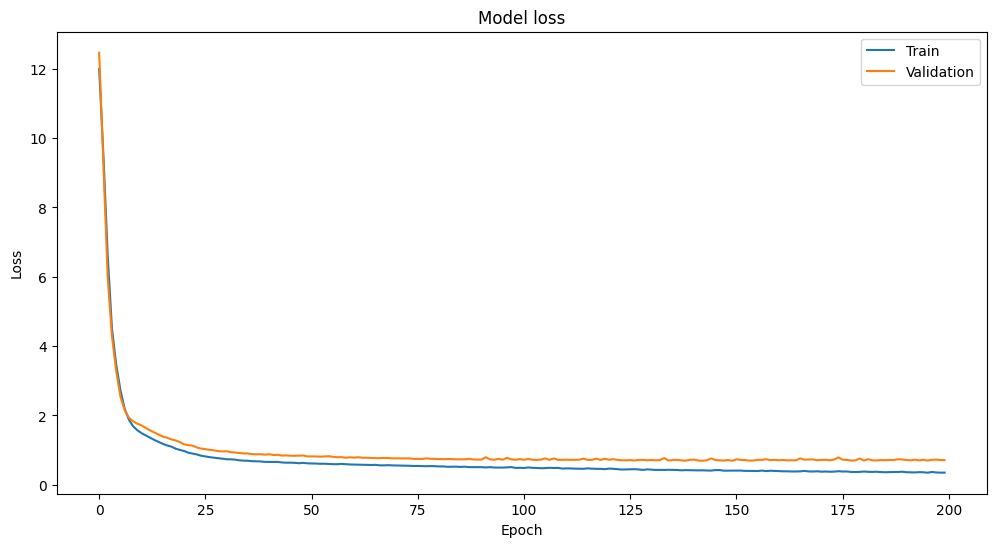

In [434]:
# 5. Plot the training and validation loss
plt.figure(figsize=(12, 6))
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('Model loss')
plt.ylabel('Loss')
plt.xlabel('Epoch')
plt.legend(['Train', 'Validation'], loc='upper right')
plt.show()